# Model design and Data Visualization

Radhika Mardikar

# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    
connection = psycopg2.connect(
    user = "",
    password = "",
    host = "",
    port = "",
    database = "postgres"
)

cursor = connection.cursor()

Determining the best customers requires the following steps:

1. Count of purchases made by customer
2. Frequency of purchases made by customer
3. Average dollar amount spent by customer per transaction
4. Distance of nearest store to custommer

For the sake of this model, we define best customers are those that consistently purchase something from the store over many weeks. A model must be designed to accurately weight all of the factors listed above and this can be done using GridSearch to find the best weights for each of the features. For visualization purposes however, we will show a line graph to visually see if there is a correlation between number of purchases made and the average purchase amount.

The query below shows the amount of times a customer has purchased something from the store in the past year and their average spendings. In general, frequent patronage is more valuable then one-time customers, but looking at the average spendings is also useful. We wouldn't want to miss out on any one time very high purchases, however those customers would not be considered our best customers because they are not frequent patrons. 


In [3]:
rollback_before_flag = True
rollback_after_flag = True

query = """
Select count(customer_id) as number_of_purchases, customer_id, avg(total_amount) as avg_purchase_amount
from sales
group by customer_id
order by avg_purchase_amount desc, number_of_purchases desc
"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,number_of_purchases,customer_id,avg_purchase_amount
0,19,20437,99.789474
1,17,26415,97.411765
2,24,7221,97.000000
3,23,6742,96.521739
4,29,20742,95.172414
...,...,...,...
31042,32,17646,41.250000
31043,46,28241,41.217391
31044,24,22515,41.000000
31045,22,961,38.181818


<AxesSubplot:xlabel='Average amount spent per purchase', ylabel='Number of purchases'>

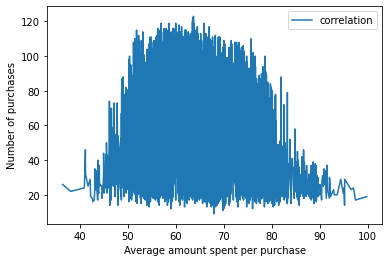

In [4]:
ax = plt.gca()

df.plot(kind='line', x = 'avg_purchase_amount', y = 'number_of_purchases', ax = ax, label = 'correlation', ylabel = 'Number of purchases', xlabel = 'Average amount spent per purchase')

As we can see, the distribution is almost Gaussian with the higher and lower purchase amounts have lower count of sales made. It is apparent here that our best customers lie in the middle of the bell curve spending an average of 60-70 dollars per transaction.

From here, we would need to monitor the frequency of purchases (over periods of time), and correlate with the distance the customer has to travel, to determine which out of that middle section of the bell curve are our best customers.